<a href="https://colab.research.google.com/github/Steve246/CV-Website/blob/master/Train1_LinearRegressionOneVaribale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt #import matplotlib

In [ ]:
import numpy as np #import numpy

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() #ubah tensorflow 2.0 jad 1.0 version

In [ ]:
COLUMNS = ["url", "title_length", "article_length", "keywords", "shares"] #yang mau kita ambil sebagai variabel dari data yang ingin dibaca

In [ ]:
data = np.genfromtxt('OnlineNewsPopularitySample.csv', delimiter=',', names=COLUMNS) #buat baca data

In [ ]:
initial_b = 1.0

In [ ]:
initial_m = 1.0

In [ ]:
w = tf.Variable([initial_b, initial_m], name ="w") #ubah jadi variable yang bisa dibaca tensorflow

In [ ]:
print(w[0])

Tensor("strided_slice_12:0", shape=(), dtype=float32)


In [ ]:
print(w[1])

Tensor("strided_slice_13:0", shape=(), dtype=float32)


In [ ]:
article_length = tf.placeholder("float")
shares = tf.placeholder("float") #assign variable

In [ ]:
predicted_shares = tf.add(tf.multiply(w[1], article_length), w[0]) # [initial_m(1) x article_length ] + 1 --> y = m theta1 + theta0

In [ ]:
error = tf.multiply(tf.square(predicted_shares - shares), .00001) #cost function, dia masukin linear regression dikurangin actual value

In [ ]:
step_size = .0015

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(step_size).minimize(error)

In [ ]:
model = tf.global_variables_initializer() 

In [ ]:
with tf.Session() as session:
  session.run(model)
  data_to_use = {article_length: data['article_length'], shares : data['shares']}
  
  for i in range(100):
    session.run(optimizer, feed_dict = data_to_use)
    if(i % 100 ==0):
      print(session.run(w))

  

  w_value = session.run(w)
  print("Predicted model: {a:.3f}x + {b:.3f}".format(a = w_value[1], b = w_value[0]))

[0.99998343 1.0006498 ]
Predicted model: 1.001x + 0.998


Text(0.5, 0, 'Article(words')

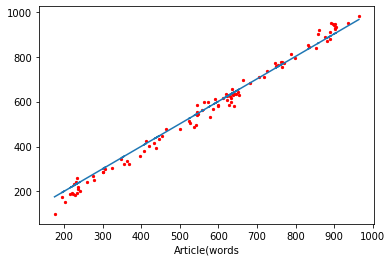

In [ ]:
fig  = plt.figure()
plt.scatter(data['article_length'], data['shares'], color = 'r', s = 5.0)
plt.plot(data['article_length'], data['article_length']*w_value[1] + w_value[0])
plt.xlabel('Article(words')